In [2]:
from keras.datasets import boston_housing
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [5]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std


In [6]:
from keras import models,layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(13,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',
                 loss='mse',metrics=['mae'])
    return model


In [13]:
import numpy as np

k=4
num_val_sample=len(train_data)//k
num_epochs=50
all_score=[]

for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_sample:(i+1)*num_val_sample]
    val_labels=train_labels[i*num_val_sample:(i+1)*num_val_sample]
    
    partical_train_data=np.concatenate(
    [train_data[:i*num_val_sample],
    train_data[(i+1)*num_val_sample:]],
    axis=0)
    
    partical_train_labels=np.concatenate(
    [train_labels[:i*num_val_sample],
    train_labels[(i+1)*num_val_sample:]],
    axis=0)
    
    model=build_model()
    
    model.fit(partical_train_data,partical_train_labels,
             epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_labels,verbose=0)
    all_score.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
all_score

[2.071829621154483, 2.6108129284169412, 2.6355072295311652, 2.4112258771858595]

In [15]:
np.mean(all_score)

2.432343914072112

In [26]:
import numpy as np

k=4
num_val_sample=len(train_data)//k
num_epochs=500
all_score=[]

for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_sample:(i+1)*num_val_sample]
    val_labels=train_labels[i*num_val_sample:(i+1)*num_val_sample]
    
    partical_train_data=np.concatenate(
    [train_data[:i*num_val_sample],
    train_data[(i+1)*num_val_sample:]],
    axis=0)
    
    partical_train_labels=np.concatenate(
    [train_labels[:i*num_val_sample],
    train_labels[(i+1)*num_val_sample:]],
    axis=0)
    
    model=build_model()
    
    history=model.fit(partical_train_data,partical_train_labels,
              validation_data=(val_data,val_labels),
             epochs=num_epochs,batch_size=1,verbose=0)
    mae_history=history.history['val_mean_absolute_error']
    all_score.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [27]:
average_mae_history=[np.mean([x[i] for x in all_score]) for i in range(num_epochs)]

In [25]:
len(all_score[])

50

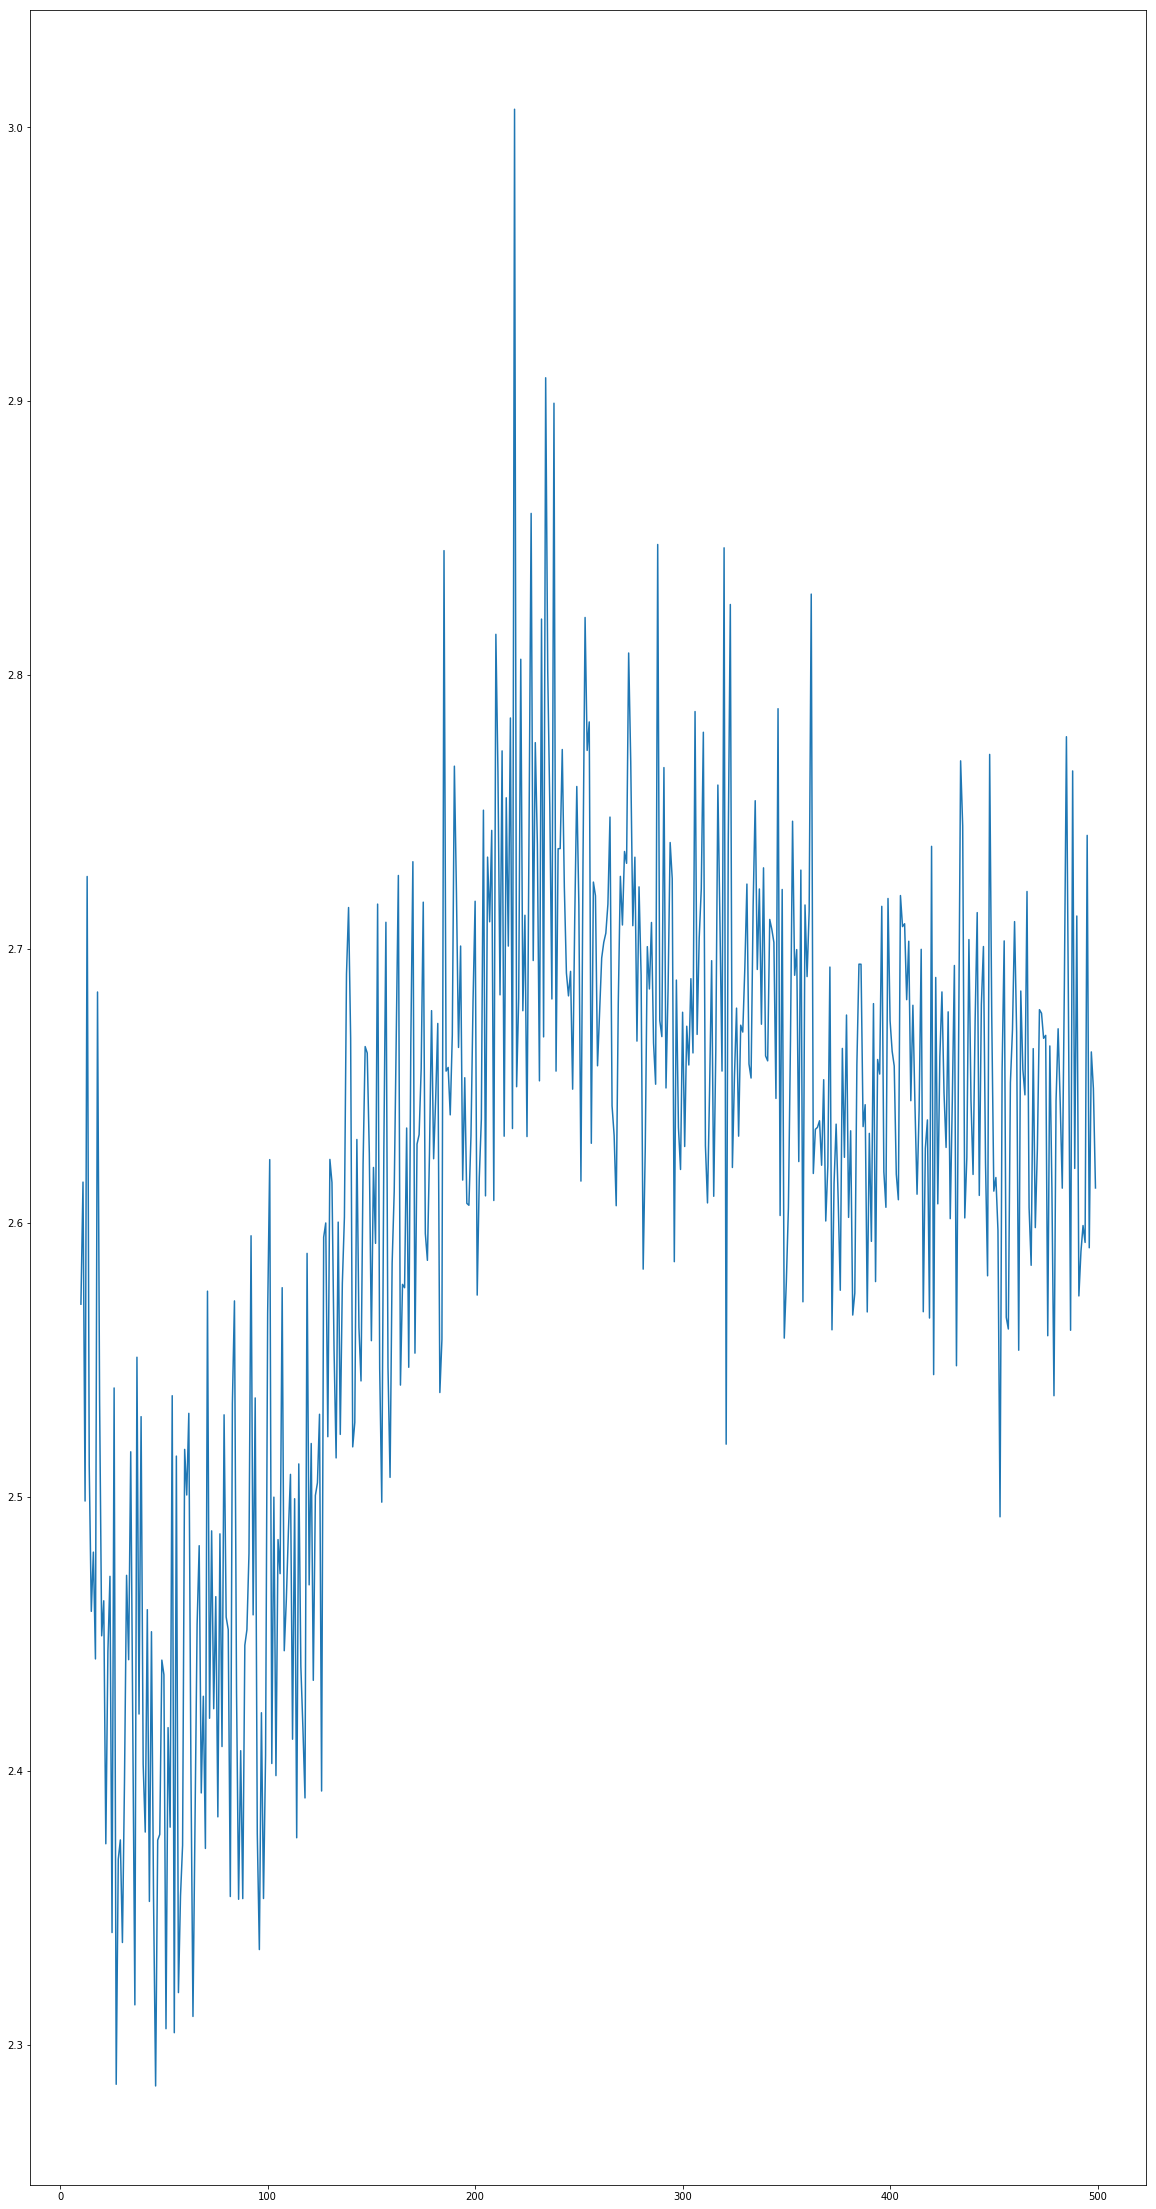

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,40))
plt.plot(range(10,len(average_mae_history)),average_mae_history[10:])
plt.show()

In [61]:
import os
abspath=os.path.abspath('test.ipynb')
os.path.dirname(abspath)
os.path.basename(abspath)
os.path.isfile(abspath)
os.path.getsize(abspath)

24847